### 목표
- 붓꽃의 꽃잎 길이, 너비/꽃받침 길이, 너비 특징 4개를 활용하여 3가지 품종의 붓꽃을 분류해보자
- knn모델의 이웃의 수를 조정해보자(n_neighbors개수를 조정 -> k값을 조정) : 하이퍼 파라미터 조정

In [1]:
# 데이터 분석에 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#머신러닝 도구
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
# train세트와 test 세트를 자동으로 분류해주는 라이브러리
from sklearn.model_selection import train_test_split
#데이터 불러오기
from sklearn.datasets import load_iris #붓꽃데이터 가져오기

In [2]:
# iris 데이터 열어서 확인
iris_data = load_iris()
iris_data 
# 번치(bunch)객체 : 파이썬의 딕셔너리와 유사한 머신러닝 전용 데이터 구조

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 딕셔너리 key값을 확인
iris_data.keys()

# data : X, 문제, 독립변수, 설명변수, 특성, feature 
# target : y, 답, 종속변수, 반응변수, label, 라벨
# feature_names : 특성의 이름 
# taget_name : 답데이터의 이름
# DESCR : 기술통계, 데이터정보( 크기 , 상관관계, 출처)
# 필수적 입력 데이터: data, target
# 옵션 데이터 : feature_name, target_names, DESCR, frame, filename ... 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# 문제 데이터 살펴보기
# iris_data['data']
iris_data.data
# 크기 -> .shape
print(iris_data.data.shape)
# 데이터 타입 -> .dtype
print(iris_data.data.dtype)
# 모델은 숫자(수치형)데이터만 인식, 학습
# 차원 -> .ndim
print(iris_data.data.ndim)

(150, 4)
float64
2


In [7]:
# 문제데이터
iris_data.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
# 특성의 이름 확인하기
iris_data.feature_names

#['sepal length (cm)',  : 꽃받침의 길이
#'sepal width (cm)',    : 꽃받침의 너비
#'petal length (cm)',   : 꽃잎의 길이
#'petal width (cm)']    : 꽃잎의 너비
# 총 4개의 특성으로 붓꽃 품종을 분류해보자 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# 답 데이터 살펴보기
iris_data.target
# setosa - 0 , versicolor -1 , virginica - 2 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# 기술 통계량 확인(DESCR)
print(iris_data.DESCR)
# Class Correlation 클래스와의 상관관계 -> 상관계수
# -1 ~ 1 표현되는 상관계수
# -1과 +1에 가까울수록 상관이 어느정도 높다
# 0에 가까울수록 상대적으로 상관관계가 적다
# petal length, patal width 2개 컬럼이 붓꽃 품종을 분류하는데 큰 도움을 주고 있는 특성

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 데이터셋 구성하기 
 - numpy(arr) -> 특성데이터(문제)만 df으로 변경
 - X,y 정의
 - train_test_split 도구를 활용해서 train set 와 test set 구성

In [11]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
# 제시된 문제데이터를 DataFrame 형태로 변환 -> 컬럼의 이름도 추가해서
dic = {iris_data.feature_names[0]: iris_data.data[:,0],
       iris_data.feature_names[1]: iris_data.data[:,1],
       iris_data.feature_names[2]: iris_data.data[:,2],
       iris_data.feature_names[3]: iris_data.data[:,3]}
pd.DataFrame(dic)# 방법1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
iris_df = pd.DataFrame(iris_data.data, columns= iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
# 문제와 답을 X와 y에 집어넣기 
X = iris_df
y = iris_data.target
# 데이터 균형 -> 데이터에 편향이 있는지 없는지? 
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [30]:
# 훈련세트, 테스트세트 분리
# train_test_split 도구 활용(랜덤 샘플링)
# 7:3(train 70, test 30%)
# random_state = 3 (랜덤하게 섞는 기준을 고정하는 것)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size= 0.3, # 30%
                                                 random_state = 3)
# 4개 변수 크기
# .shape
print('훈련 데이터셋 크기: ', X_train.shape, y_train.shape)
print('테스트 데이터셋 크기: ',X_test.shape,y_test.shape)

훈련 데이터셋 크기:  (105, 4) (105,)
테스트 데이터셋 크기:  (45, 4) (45,)


In [31]:
# 훈련세트와 테스트세트로 나눈 후에도 데이터의 다양성이 유지되고 있는지 확인
# y_train의 카테고리별 개수 확인
# return_counts = True : 각각의 카테고리가 몇 개씩 있는지 알려줌
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([33, 36, 36], dtype=int64))

### 탐색적 데이터 분석(EDA)
- 산점도 행렬(scatterplot matrix) : 한꺼번에 특성 간의 관계를 일목요연하게 보는게 가능
- 각 특성을 결합하여 3가지 붓꽃 품종이 잘 분리가 되는 특성이 있는지 확인

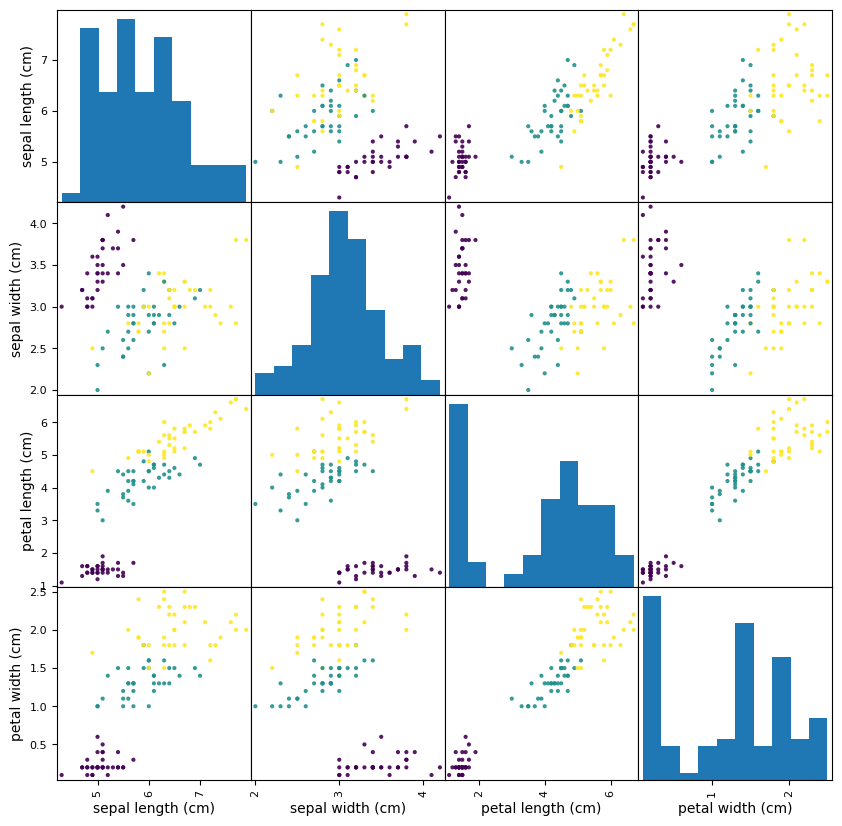

In [33]:
pd.plotting.scatter_matrix(X_train, #문제데이터(좌표)
                            figsize = (10,10), #그래프크기
                            c = y_train, #클래스별 색상 설정
                            alpha = 0.9) # 그래프 산점도 점 투명도
plt.show()

# 같은 색상의 점끼리 뭉쳐있고, 다른색상과는 위치적으로 구별이 된다면
# 해당 특성 결합이 붓꽃 품종을 분류하는데 큰 의미가 있는 것이라고 판단할 수 있다.
# petal length(꽃잎 길이), petal width(꽃잎 너비)가 붓꽃 품종을 분류하는데 큰 의미가 있는 특성!

### 모델링

In [34]:
# 모델 객체 생성
# 이웃의 수 5
# 모델명 iris_knn_model
iris_knn_model = KNeighborsClassifier(n_neighbors = 5)

In [35]:
iris_knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
# 모델 예측
pre = iris_knn_model.predict(X_test)
pre
print('-테스트셋 전체를 이용한 예측 결괴: \n',pre)
print('-예상되는 품종?',iris_data.target_names[pre])

-테스트셋 전체를 이용한 예측 결괴: 
 [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
-예상되는 품종? ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa'
 'virginica']


In [40]:
# 정확도 측정
# k= 5 (이웃의 수 =5)
accuracy_score(y_test,pre) # 95.6%
# 과대적합, 과소적합을 확인하기 위해서 k값을 바꿔가면서 모델링할 필요

0.9555555555555556

### 하이퍼파라미터 튜닝
- knn에서는 이웃의 수(k,n_neighbors)를 하이퍼파라미터라고 한다.
- for문을 돌리면서 k값을 바꾸고 해당 시점의 train acc, test acc 빈 리스트에 저장
- 그 이후 선 그래프로 복잡도 곡선을 그려보자

In [41]:
X_train.shape

(105, 4)

In [42]:
# k값은 1~train의 행 개수만큼 설정이 가능하다
# 1~50으로 값 설정
k_range = range(1,51) # 이웃의 수 범위
# train, test 정확도를 담을 빈 리스트
train_acc_lst =[]
test_acc_lst =[]

for k in k_range:
    #knn 모델 생성
    model = KNeighborsClassifier(n_neighbors= k)
    # knn 모델 학습
    model.fit(X_train,y_train)
    # knn 모델 예측
    X_train_pre = model.predict(X_train)
    X_test_pre = model.predict(X_test)
    # knn 모델의 정확도
    X_train_acc = accuracy_score(y_train, X_train_pre)
    X_test_acc = accuracy_score(y_test, X_test_pre)
    # 빈 리스트에 추가
    train_acc_lst.append(X_train_acc)
    test_acc_lst.append(X_test_acc)

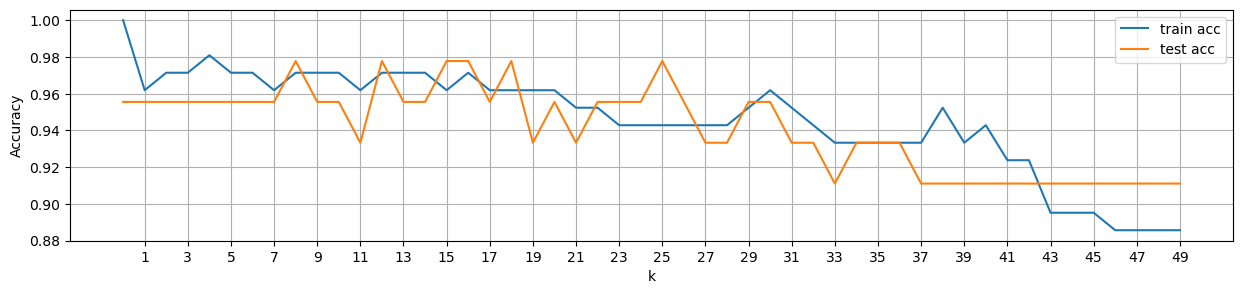

In [44]:
# 선그래프
plt.figure(figsize = (15,3))
plt.plot(train_acc_lst, label = 'train acc')
plt.plot(test_acc_lst, label = 'test acc')
plt.legend() # 범례 표시
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1,50,2)) # x축 격자 눈금
plt.grid()
plt.show()
# 파란색 그래프 -> train 데이터 정확도 1일때 100%
# 주황색 그래프 -> test 데이터 정확도 1일때 96%
# 과대적합은 test 예측을 잘 못한다.정확도가 1일 때는 과대 적합이라고 할수 있겠구나!
# 과소적합은 test, train 예측을 둘 다 못한다. k 값이 27정도 됐을 때 부터는 과소적합이겠다!
# 모델의 하이퍼파라미터가 변화하는 모습을 그래프에서 확인할 수 있다. 
# -> 신빙성이 있는 정확도인가? No
# 데이터의 수가 너무 적기 때문 
# 일반화 모델 정의는 여러번 검증할 필요